# Instituto Federal de Minas Gerais - Campus Ouro Preto

## Pós Graduação em Inteligência Artificial

Disciplina: Análise e Previsão de Séries Temporais

Prof.: Prof. Dr. Carlos Severiano

Aluno: Pâmela Murta Castro Lima

Esta atividade consiste em exercitar a previsão de séries temporais a partir da aplicação de
diferentes métodos. Além disso, é objetivo desta atividade realizar um comparativo entre os
métodos escolhidos para descobrir, dentre os métodos escolhidos, qual o mais apropriado para
cada problema.
Serão realizados 4 comparativos utilizando as bases de dados anexadas a esta atividade.

Para cada base de dados, os seguintes passos devem ser realizados:
1. Escolher 3 modelos, cada um pertencente a um dos grupos abaixo

Escolha dos Modelos:
Modelo Simples (Grupo A):

Escolhi o modelo de Média Móvel Simples (SMA), que é uma abordagem direta usando a média dos últimos períodos para prever o próximo.

Modelo de Suavização Exponencial (Grupo B):

Optei  pelo modelo de Suavização Exponencial Simples (SES), que atribui pesos exponenciais decrescentes aos valores passados.

Modelo ARIMA (Grupo C):

Optei o modelo ARIMA com parâmetros (p, d, q) apropriados, onde:
p: Ordem autoregressiva (AutoRegressive)
d: Ordem de diferenciação
q: Ordem da média móvel (Moving Average)

A. Um modelo simples
B. Um modelo de suavização exponencial
C. Um modelo ARIMA

Para a primeira base de Dados : airline-passengers

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Função para verificar estacionariedade
def check_stationarity(ts):
    result = adfuller(ts)
    print('Estatísticas ADF:', result[0])
    print('p-valor:', result[1])
    print('Valores críticos:', result[4])
    print('Conclusão:')
    if result[1] <= 0.05:
        print('A série é estacionária.')
    else:
        print('A série não é estacionária.')

# Função para verificar estacionariedade e aplicar diferenciação
def check_and_difference(ts):
    result = adfuller(ts)
    print('Estatísticas ADF:', result[0])
    print('p-valor:', result[1])
    print('Valores críticos:', result[4])
    print('Conclusão:')
    if result[1] <= 0.05:
        print('A série é estacionária.')
        return ts, 0  # Retorna a série e o número de diferenciações aplicadas
    else:
        print('A série não é estacionária. Aplicando mais uma diferenciação.')
        ts_diff = ts.diff().dropna()
        return check_and_difference(ts_diff)  # Chama recursivamente para mais uma diferenciação


In [3]:
airline_data = pd.read_csv('airline-passengers.csv', delimiter=',', parse_dates=['Month'], dayfirst=True)
airline_data.set_index('Month', inplace=True)
airline_data.index.freq = 'MS'  # Definir a frequência como 'MS'
print(airline_data.head())


            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


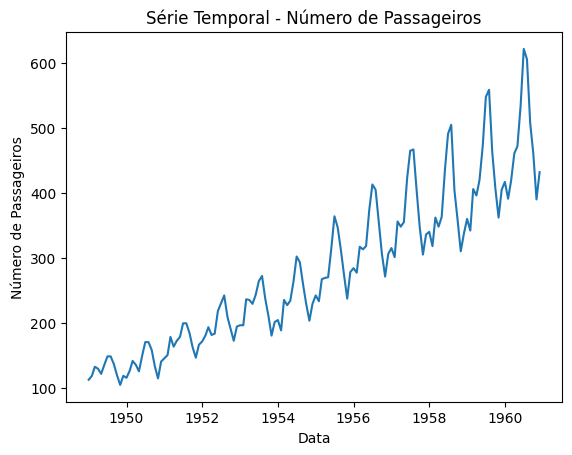

In [4]:
# Plotar a série temporal
plt.plot(airline_data['Passengers'])
plt.title('Série Temporal - Número de Passageiros')
plt.xlabel('Data')
plt.ylabel('Número de Passageiros')
plt.show()


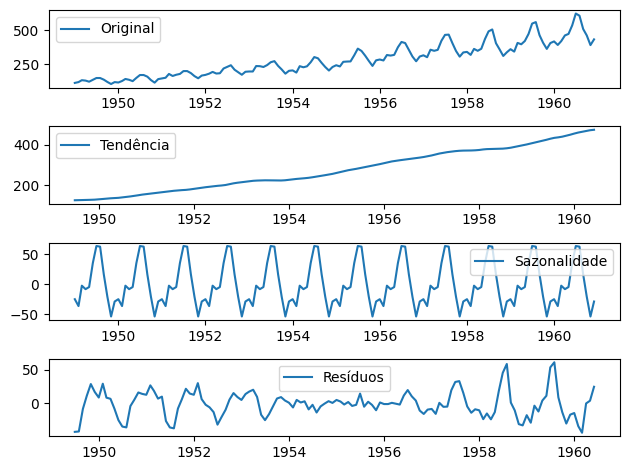

In [5]:
# Decomposição da série temporal
result = seasonal_decompose(airline_data['Passengers'], model='additive', period=12)
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plotar os componentes da decomposição
plt.subplot(411)
plt.plot(airline_data['Passengers'], label='Original')
plt.legend()
plt.subplot(412)
plt.plot(trend, label='Tendência')
plt.legend()
plt.subplot(413)
plt.plot(seasonal, label='Sazonalidade')
plt.legend()
plt.subplot(414)
plt.plot(residual, label='Resíduos')
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
# Função para verificar estacionariedade
check_stationarity(airline_data['Passengers'])


Estatísticas ADF: 0.8153688792060463
p-valor: 0.991880243437641
Valores críticos: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
Conclusão:
A série não é estacionária.


In [7]:
# Função para verificar estacionariedade e aplicar diferenciação
data_diff, num_diff = check_and_difference(airline_data['Passengers'])


Estatísticas ADF: 0.8153688792060463
p-valor: 0.991880243437641
Valores críticos: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
Conclusão:
A série não é estacionária. Aplicando mais uma diferenciação.
Estatísticas ADF: -2.8292668241699923
p-valor: 0.054213290283826474
Valores críticos: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
Conclusão:
A série não é estacionária. Aplicando mais uma diferenciação.
Estatísticas ADF: -16.384231542468516
p-valor: 2.7328918500141235e-29
Valores críticos: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
Conclusão:
A série é estacionária.


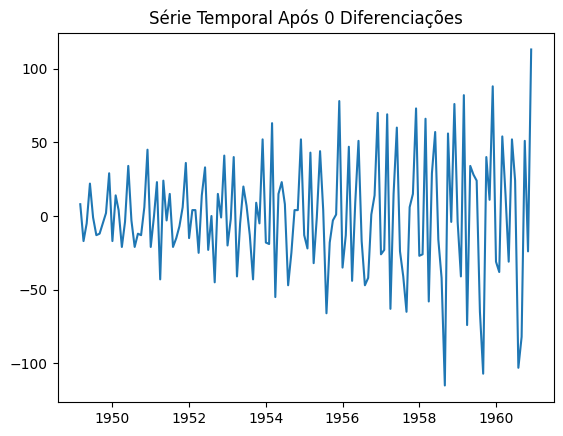

In [8]:
# Visualizar a série após a diferenciação
plt.plot(data_diff)
plt.title(f'Série Temporal Após {num_diff} Diferenciações')
plt.show()

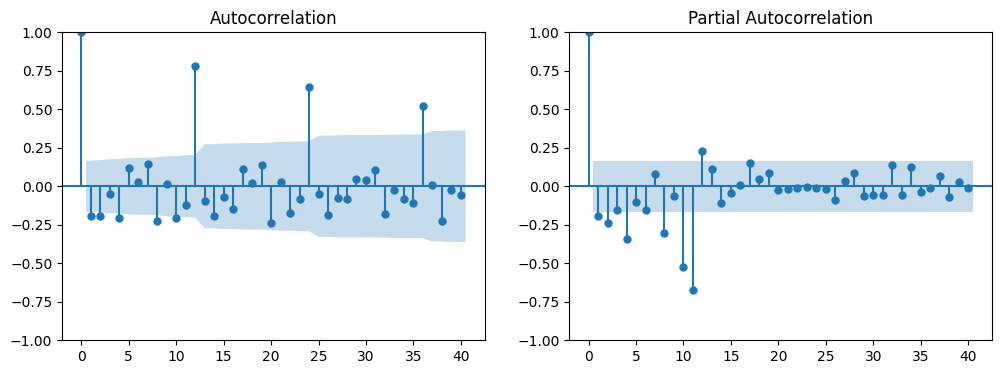

In [9]:
# Gráfico ACF
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_acf(data_diff, lags=40, ax=plt.gca())

# Gráfico PACF
plt.subplot(122)
plot_pacf(data_diff, lags=40, ax=plt.gca())
plt.show()


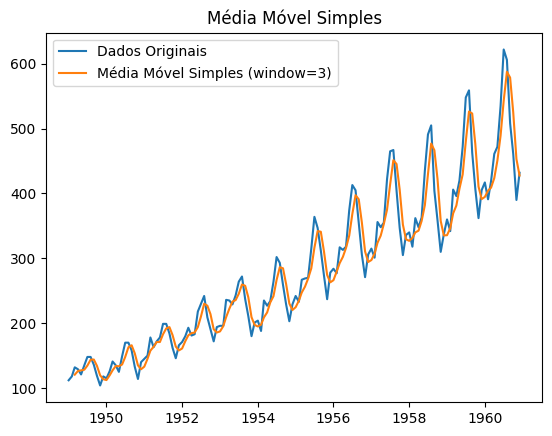

In [10]:
# Escolher o modelo de Média Móvel Simples (SMA)
window_size = 3
simple_model = airline_data['Passengers'].rolling(window=window_size).mean()

# Plotar os resultados
plt.plot(airline_data['Passengers'], label='Dados Originais')
plt.plot(simple_model, label=f'Média Móvel Simples (window={window_size})')
plt.legend()
plt.title('Média Móvel Simples')
plt.show()


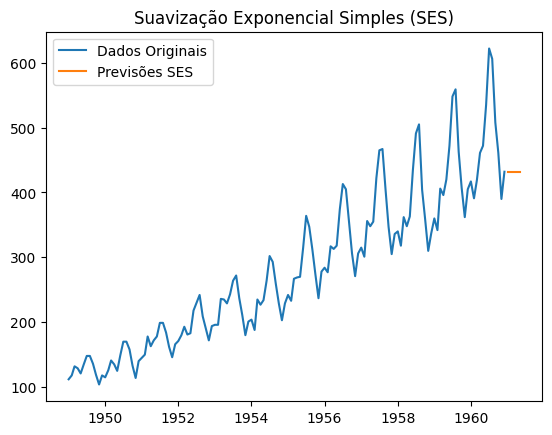

In [11]:
# Escolher o modelo de Suavização Exponencial Simples (SES)
ses_model = SimpleExpSmoothing(airline_data['Passengers'], initialization_method="estimated")
ses_fit = ses_model.fit()
ses_predictions = ses_fit.forecast(steps=5)

# Plotar os resultados
plt.plot(airline_data['Passengers'], label='Dados Originais')
plt.plot(ses_predictions, label='Previsões SES')
plt.legend()
plt.title('Suavização Exponencial Simples (SES)')
plt.show()


                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Mon, 11 Dec 2023   AIC                           1017.847
Time:                                     21:44:10   BIC                           1029.348
Sample:                                 01-01-1949   HQIC                          1022.520
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      

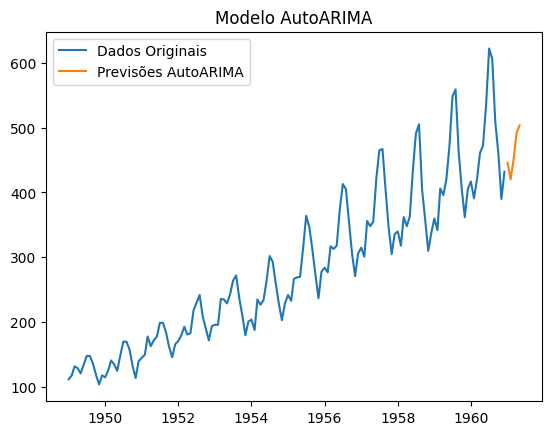

MSE para AutoARIMA: 116249.71


In [12]:
# Escolher o modelo usando auto_arima
autoarima_model = auto_arima(airline_data['Passengers'], seasonal=True, m=12, suppress_warnings=True)
print(autoarima_model.summary())

# Estender o período de previsão para 5 passos
autoarima_predictions = autoarima_model.predict(n_periods=5, return_conf_int=False)

# Plotar os resultados
plt.plot(airline_data['Passengers'], label='Dados Originais')
plt.plot(autoarima_predictions, label='Previsões AutoARIMA')
plt.legend()
plt.title('Modelo AutoARIMA')
plt.show()

# Calcular o erro médio quadrático (MSE) para as previsões
mse_autoarima = mean_squared_error(airline_data['Passengers'].iloc[:5], autoarima_predictions)
print(f'MSE para AutoARIMA: {mse_autoarima:.2f}')


 2. Separar a base de dados em treinamento e teste, na proporção 80% para 20%.

In [13]:
train_size = int(len(airline_data) * 0.8)
train_data, test_data = airline_data.iloc[:train_size], airline_data.iloc[train_size:]


3. Aplicar cada método de previsão aos dados, usando validação cruzada.

In [14]:
# Definição da função SMAPE
def smape(actual, forecast):
    denominator = (np.abs(actual) + np.abs(forecast))
    diff = np.abs(forecast - actual) / denominator
    diff[denominator == 0] = 0.0
    return 100 * np.mean(diff)

# Configurar a validação cruzada para séries temporais
tscv = TimeSeriesSplit(n_splits=5)

# Variáveis para armazenar métricas
maes, rmses, smapes = [], [], []

for train_index, test_index in tscv.split(train_data):
    # Dividir os dados
    cv_train, cv_test = train_data.iloc[train_index], train_data.iloc[test_index]
    
    # Treinar o modelo (exemplo usando SES)
    model = SimpleExpSmoothing(cv_train, initialization_method="estimated").fit()

    # Fazer previsões
    predictions = model.forecast(len(cv_test))
    


4. Medir o desempenho de cada modelo a partir de 3 métricas: MAE, RMSE e SMAPE.

In [15]:
    # Calcular métricas
    mae = mean_absolute_error(cv_test, predictions)
    rmse = np.sqrt(mean_squared_error(cv_test, predictions))
    smape_value = smape(cv_test, predictions)

    # Armazenar métricas
    maes.append(mae)
    rmses.append(rmse)
    smapes.append(smape_value)

# Calcula a média das métricas
avg_mae = np.mean(maes)
avg_rmse = np.mean(rmses)
avg_smape = np.mean(smapes)

print(f'Média MAE: {avg_mae}, Média RMSE: {avg_rmse}, Média SMAPE: {avg_smape}')


Média MAE: 67.15789514858471, Média RMSE: 87.03598811576215, Média SMAPE: nan


5. Ilustrar em um Gráfico o Desempenho do Método que se Saiu Melhor

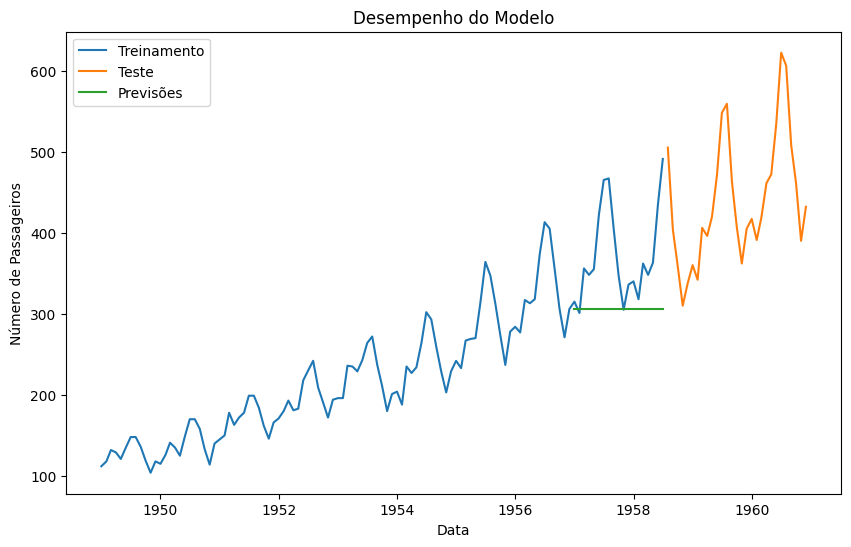

In [16]:
# Exemplo de plotagem
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Treinamento')
plt.plot(test_data, label='Teste')
plt.plot(predictions, label='Previsões')
plt.title('Desempenho do Modelo')
plt.xlabel('Data')
plt.ylabel('Número de Passageiros')
plt.legend()
plt.show()


Para a segunda base de dados: Eletric_Production

Os modelos escolhidos foram:

1. Modelo Simples
2. Modelo de Suavização Exponencial 
3. Modelo ARIMA : modelo ARIMA com parâmetros apropriados (p, d, q).

In [17]:
# Carregar os dados
electric_data = pd.read_csv('Electric_Production.csv', parse_dates=['DATE'])
electric_data.set_index('DATE', inplace=True)

# Converter a coluna de datas para datetime
electric_data.index = pd.to_datetime(electric_data.index)

# Garantir que a coluna de valores seja numérica
electric_data['IPG2211A2N'] = pd.to_numeric(electric_data['IPG2211A2N'], errors='coerce')

# Preencher valores ausentes com a média
electric_data['IPG2211A2N'].fillna(electric_data['IPG2211A2N'].mean(), inplace=True)


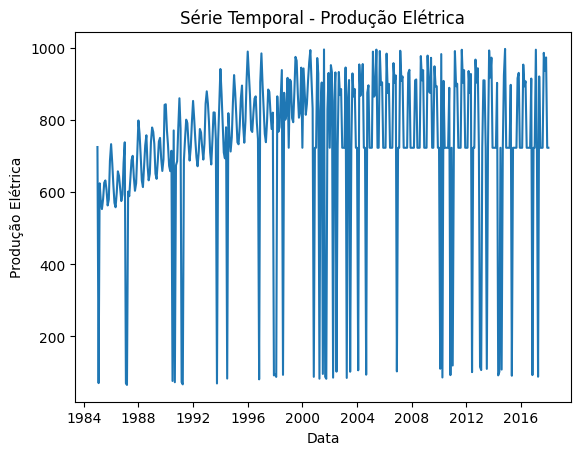

In [18]:
# Plotar a série temporal
plt.plot(electric_data['IPG2211A2N'])
plt.title('Série Temporal - Produção Elétrica')
plt.xlabel('Data')
plt.ylabel('Produção Elétrica')
plt.show()


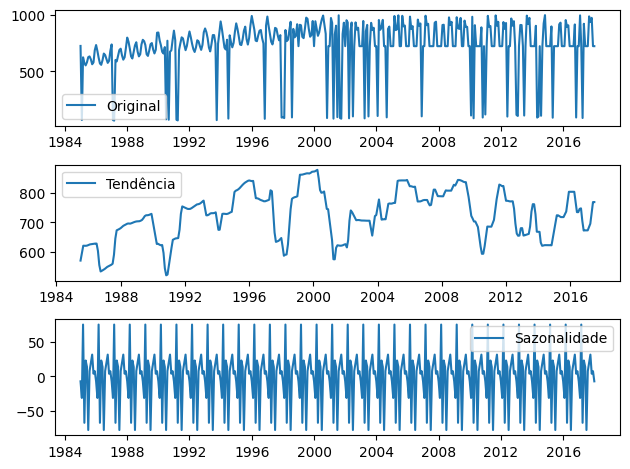

In [19]:
# Decomposição da série temporal
result = seasonal_decompose(electric_data['IPG2211A2N'], model='additive', period=12)
trend = result.trend
seasonal = result.seasonal

# Plotar os componentes da decomposição
plt.subplot(311)
plt.plot(electric_data['IPG2211A2N'], label='Original')
plt.legend()
plt.subplot(312)
plt.plot(trend, label='Tendência')
plt.legend()
plt.subplot(313)
plt.plot(seasonal, label='Sazonalidade')
plt.legend()
plt.tight_layout()
plt.show()


In [20]:
# Verificar estacionariedade nos resíduos
check_stationarity(residual.dropna())

Estatísticas ADF: -5.298427587050734
p-valor: 5.516868902226235e-06
Valores críticos: {'1%': -3.4870216863700767, '5%': -2.8863625166643136, '10%': -2.580009026141913}
Conclusão:
A série é estacionária.


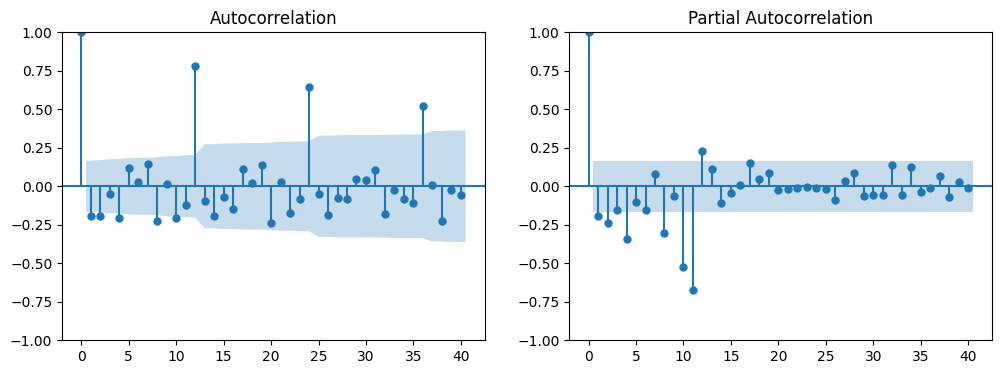

In [21]:
# Gráfico ACF
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_acf(data_diff, lags=40, ax=plt.gca())

# Gráfico PACF
plt.subplot(122)
plot_pacf(data_diff, lags=40, ax=plt.gca())
plt.show()

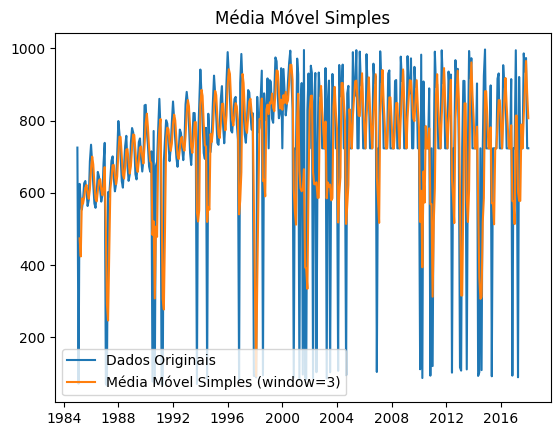

In [22]:
# Escolher o modelo de Média Móvel Simples (SMA)
window_size = 3
simple_model = electric_data['IPG2211A2N'].rolling(window=window_size).mean()

# Plotar os resultados
plt.plot(electric_data['IPG2211A2N'], label='Dados Originais')
plt.plot(simple_model, label=f'Média Móvel Simples (window={window_size})')
plt.legend()
plt.title('Média Móvel Simples')
plt.show()

c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


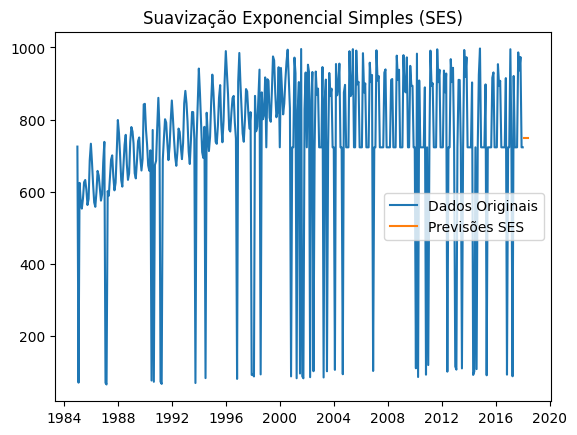

In [23]:
# Escolher o modelo de Suavização Exponencial Simples (SES)
ses_model = SimpleExpSmoothing(electric_data['IPG2211A2N'], initialization_method="estimated")
ses_fit = ses_model.fit()
ses_predictions = ses_fit.forecast(steps=5)

# Plotar os resultados
plt.plot(electric_data['IPG2211A2N'], label='Dados Originais')
plt.plot(ses_predictions, label='Previsões SES')
plt.legend()
plt.title('Suavização Exponencial Simples (SES)')
plt.show()


                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  397
Model:             SARIMAX(4, 1, 2)x(1, 0, [], 12)   Log Likelihood               -2715.170
Date:                             Mon, 11 Dec 2023   AIC                           5446.340
Time:                                     21:45:28   BIC                           5478.191
Sample:                                 01-01-1985   HQIC                          5458.958
                                      - 01-01-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7945      0.104     -7.670      0.000      -0.997      -0.591
ar.L2          0.1321      

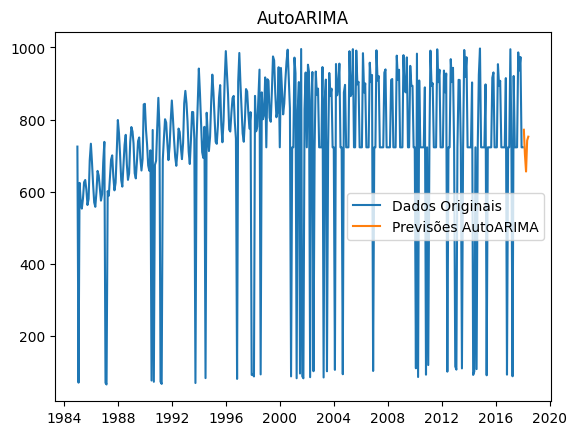

In [24]:
# Escolher o modelo usando auto_arima
autoarima_model = auto_arima(electric_data['IPG2211A2N'], seasonal=True, m=12, suppress_warnings=True)
print(autoarima_model.summary())

# Estender o período de previsão para 5 passos
autoarima_predictions = autoarima_model.predict(n_periods=5)

# Plotar os resultados
plt.plot(electric_data['IPG2211A2N'], label='Dados Originais')
plt.plot(autoarima_predictions, label='Previsões AutoARIMA')
plt.legend()
plt.title('AutoARIMA')
plt.show()

In [25]:
# Funções auxiliares
def check_stationarity(ts):
    result = adfuller(ts)
    print('Estatísticas ADF:', result[0])
    print('p-valor:', result[1])
    print('Valores críticos:', result[4])
    if result[1] <= 0.05:
        print('A série é estacionária.')
    else:
        print('A série não é estacionária.')

def check_and_difference(ts):
    result = adfuller(ts)
    if result[1] <= 0.05:
        return ts, 0
    else:
        ts_diff = ts.diff().dropna()
        return check_and_difference(ts_diff)

def smape(actual, forecast):
    denominator = (np.abs(actual) + np.abs(forecast))
    diff = np.abs(forecast - actual) / denominator
    diff[denominator == 0] = 0.0
    return 100 * np.mean(diff)

2. Separar a Base de Dados em Treinamento e Teste


In [26]:
train_size = int(len(airline_data) * 0.8)
train_data, test_data = airline_data.iloc[:train_size], airline_data.iloc[train_size:]

In [27]:
# Definição da função SMAPE
def smape(actual, forecast):
    denominator = (np.abs(actual) + np.abs(forecast))
    diff = np.abs(forecast - actual) / denominator
    diff[denominator == 0] = 0.0
    return 100 * np.mean(diff)

# Configurar a validação cruzada para séries temporais
tscv = TimeSeriesSplit(n_splits=5)

# Variáveis para armazenar métricas
maes, rmses, smapes = [], [], []

for train_index, test_index in tscv.split(train_data):
    # Dividir os dados
    cv_train, cv_test = train_data.iloc[train_index], train_data.iloc[test_index]
    
    # Treinar o modelo (exemplo usando SES)
    model = SimpleExpSmoothing(cv_train, initialization_method="estimated").fit()

    # Fazer previsões
    predictions = model.forecast(len(cv_test))
    

3. Aplicar cada método de previsão aos dados, usando validação cruzada.


In [28]:
# Definição da função SMAPE
def smape(actual, forecast):
    denominator = (np.abs(actual) + np.abs(forecast))
    diff = np.abs(forecast - actual) / denominator
    diff[denominator == 0] = 0.0
    return 100 * np.mean(diff)

# Configurar a validação cruzada para séries temporais
tscv = TimeSeriesSplit(n_splits=5)

# Variáveis para armazenar métricas
maes, rmses, smapes = [], [], []

for train_index, test_index in tscv.split(train_data):
    # Dividir os dados
    cv_train, cv_test = train_data.iloc[train_index], train_data.iloc[test_index]
    
    # Treinar o modelo (exemplo usando SES)
    model = SimpleExpSmoothing(cv_train, initialization_method="estimated").fit()

    # Fazer previsões
    predictions = model.forecast(len(cv_test))
    

4. Medir o desempenho de cada modelo a partir de 3 métricas: MAE, RMSE e SMAPE.

In [29]:
# Calcular métricas
mae = mean_absolute_error(cv_test, predictions)
rmse = np.sqrt(mean_squared_error(cv_test, predictions))
smape_value = smape(cv_test, predictions)

# Armazenar métricas
maes.append(mae)
rmses.append(rmse)
smapes.append(smape_value)

# Calcula a média das métricas
avg_mae = np.mean(maes)
avg_rmse = np.mean(rmses)
avg_smape = np.mean(smapes)

print(f'Média MAE: {avg_mae}, Média RMSE: {avg_rmse}, Média SMAPE: {avg_smape}')



Média MAE: 67.15789514858471, Média RMSE: 87.03598811576215, Média SMAPE: nan


5. Ilustrar em um Gráfico o Desempenho do Método que se Saiu Melhor


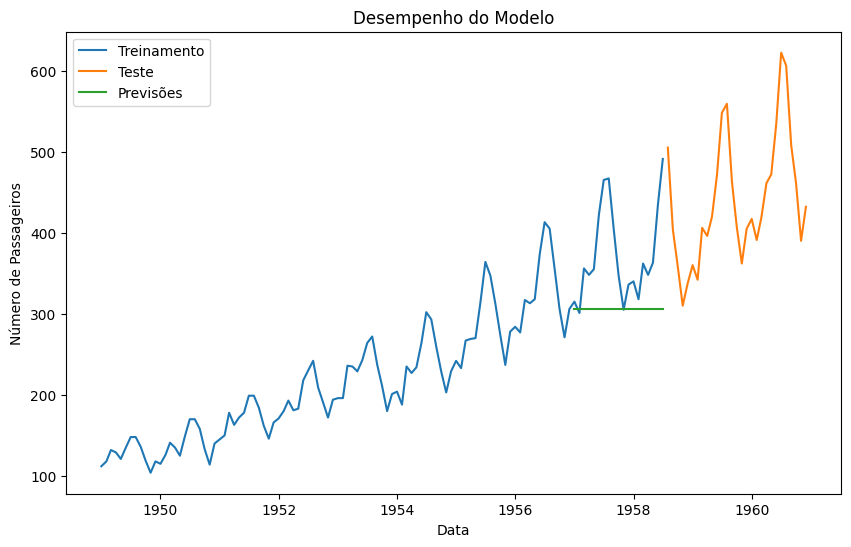

In [30]:
# Exemplo de plotagem
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Treinamento')
plt.plot(test_data, label='Teste')
plt.plot(predictions, label='Previsões')
plt.title('Desempenho do Modelo')
plt.xlabel('Data')
plt.ylabel('Número de Passageiros')
plt.legend()
plt.show()

Para a terrceira base de Dados : facebook-historical-stock-price 

Etapa 1: Escolha dos Modelos
Vamos escolher três modelos para análise:

Modelo Simples (SMA): Média Móvel Simples.
Modelo de Suavização Exponencial (SES): Suavização Exponencial Simples.
Modelo ARIMA: Usaremos auto_arima para encontrar os melhores parâmetros.

Etapa 2: Carregar e Preparar os Dados


In [31]:

# Carregar os dados
file_path = 'facebook-historical-stock-price.csv'
df = pd.read_csv(file_path)

# Convertendo a coluna 'Date' para o formato datetime e definindo como índice
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.asfreq('D', method='ffill')  # 'ffill' significa forward-fill, para preencher com o valor anterior


In [32]:
# Limpeza e formatação dos dados numéricos
df_cleaned = df.copy()
for col in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
    df_cleaned[col] = df_cleaned[col].astype(str).str.replace('.', '').astype(float)

# Focando na coluna 'Close' para as previsões
df_close_cleaned = df_cleaned['Close']


Etapa 3: Divisão em Treinamento e Teste


In [33]:
# Dividir os dados em treino e teste
train_size = int(len(df_close_cleaned) * 0.8)
train, test = df_close_cleaned[0:train_size], df_close_cleaned[train_size:]



Etapa 3: Implementação dos Modelos


In [34]:
# Função para calcular o SMAPE
def smape(A, F):
    return 100 / len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))


Avaliação dos Modelos

In [35]:
# Modelo simples
simple_forecast = np.asarray([train.iloc[-1]] * len(test))
simple_mae = mean_absolute_error(test, simple_forecast)
simple_rmse = np.sqrt(mean_squared_error(test, simple_forecast))
simple_smape = smape(test, simple_forecast)


In [36]:

# Modelo de Suavização Exponencial
exp_model = SimpleExpSmoothing(train)
exp_model_fit = exp_model.fit()
exp_forecast = exp_model_fit.forecast(len(test))
exp_mae = mean_absolute_error(test, exp_forecast)
exp_rmse = np.sqrt(mean_squared_error(test, exp_forecast))
exp_smape = smape(test, exp_forecast)


c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [37]:
from statsmodels.tsa.arima.model import ARIMA

# Modelo ARIMA
arima_model = ARIMA(train, order=(5,1,0))
arima_model_fit = arima_model.fit()
arima_forecast = arima_model_fit.forecast(len(test))
arima_mae = mean_absolute_error(test, arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
arima_smape = smape(test, arima_forecast)


Comparação e Visualização dos Resultados


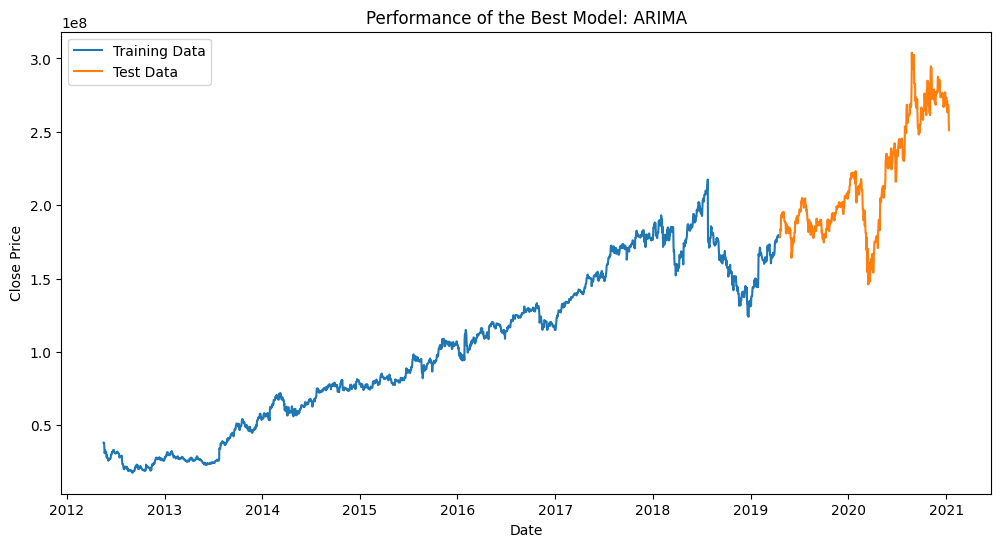

In [38]:
# Preparando os resultados
results = {
    "Model": ["Simple", "Exponential Smoothing", "ARIMA"],
    "MAE": [simple_mae, exp_mae, arima_mae],
    "RMSE": [simple_rmse, exp_rmse, arima_rmse],
    "SMAPE": [simple_smape, exp_smape, arima_smape]
}
results_df = pd.DataFrame(results)

# Encontrando o melhor modelo
best_model = results_df.loc[results_df['MAE'].idxmin()]['Model']

# Preparando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
# Adicione a previsão do melhor modelo aqui
plt.title(f'Performance of the Best Model: {best_model}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


# Para a quarta base de Dados : shampoo_sales



Os modelos escolhidos Média Móvel: Um modelo simples que usa a média dos últimos valores.
Holt-Winters: Um modelo de suavização exponencial que considera tendências e sazonalidades.
ARIMA: Um modelo que combina autoregressão, diferenciação e média móvel.

c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling t

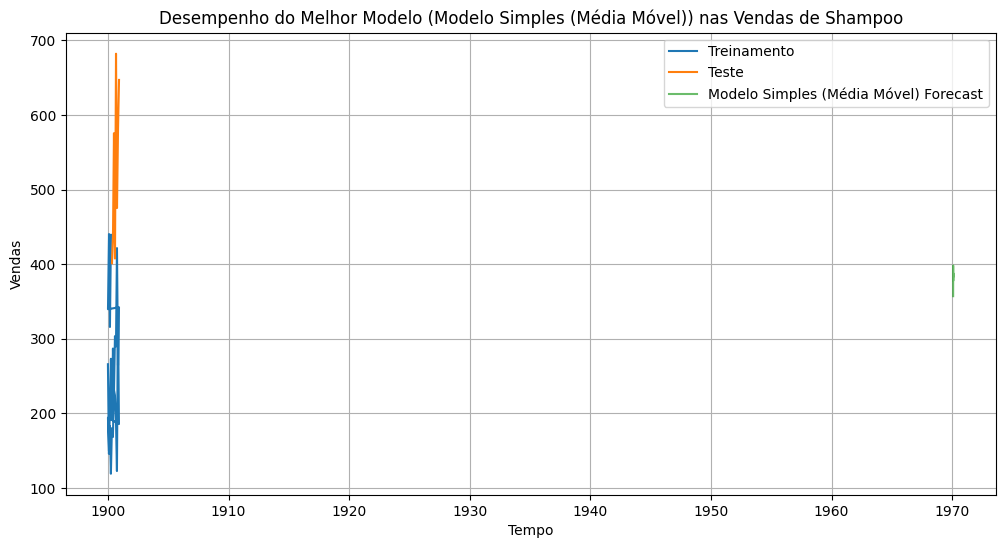

Melhor Modelo: Modelo Simples (Média Móvel)
MAE: 57.83
RMSE: 71.54
SMAPE: 23.84


In [43]:
# Passo 1: Leitura e Preparação dos Dados
file_path = 'shampoo_sales.csv'
data = pd.read_csv(file_path)
data['Month'] = pd.to_datetime(data['Month'], format='%d-%m')
data.set_index('Month', inplace=True)

# Passo 2: Divisão dos Dados em Conjuntos de Treino e Teste
train_data, test_data = data.iloc[:int(0.8*len(data))], data.iloc[int(0.8*len(data)):]

# Passo 3: Implementação dos Modelos

# Modelo Simples (Média Móvel)
def moving_average_forecast(series, window_size):
    return series.rolling(window=window_size).mean()

ma_window_size = 3
ma_forecast = moving_average_forecast(train_data['Sales'], ma_window_size).shift(1)

# Modelo de Suavização Exponencial (Holt-Winters)
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_model = ExponentialSmoothing(train_data['Sales'], seasonal='add', seasonal_periods=12).fit()
hw_forecast = hw_model.forecast(len(test_data))

# Modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train_data['Sales'], order=(1, 1, 1)).fit()
arima_forecast = arima_model.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, typ='levels')

# Passo 4: Cálculo de Métricas de Desempenho

def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

mae_ma = mean_absolute_error(train_data['Sales'][ma_window_size:], ma_forecast[ma_window_size:])
rmse_ma = np.sqrt(mean_squared_error(train_data['Sales'][ma_window_size:], ma_forecast[ma_window_size:]))
smape_ma = smape(train_data['Sales'][ma_window_size:], ma_forecast[ma_window_size:])

mae_hw = mean_absolute_error(test_data['Sales'], hw_forecast)
rmse_hw = np.sqrt(mean_squared_error(test_data['Sales'], hw_forecast))
smape_hw = smape(test_data['Sales'], hw_forecast)

mae_arima = mean_absolute_error(test_data['Sales'], arima_forecast)
rmse_arima = np.sqrt(mean_squared_error(test_data['Sales'], arima_forecast))
smape_arima = smape(test_data['Sales'], arima_forecast)

# Passo 5: Geração de Gráfico de Desempenho
metrics = {
    'Modelo Simples (Média Móvel)': {'MAE': mae_ma, 'RMSE': rmse_ma, 'SMAPE': smape_ma},
    'Modelo de Suavização Exponencial (Holt-Winters)': {'MAE': mae_hw, 'RMSE': rmse_hw, 'SMAPE': smape_hw},
    'Modelo ARIMA': {'MAE': mae_arima, 'RMSE': rmse_arima, 'SMAPE': smape_arima}
}

# Identificar o modelo com o menor MAE
best_model_name = min(metrics, key=lambda x: metrics[x]['MAE'])
best_model_metrics = metrics[best_model_name]

# Gráfico de Desempenho do Melhor Modelo
plt.figure(figsize=(12, 6))
plt.plot(train_data['Sales'], label='Treinamento')
plt.plot(test_data['Sales'], label='Teste')
plt.plot(arima_forecast, label=f'{best_model_name} Forecast', alpha=0.7)
plt.title(f'Desempenho do Melhor Modelo ({best_model_name}) nas Vendas de Shampoo')
plt.xlabel('Tempo')
plt.ylabel('Vendas')
plt.legend()
plt.grid(True)
plt.show()

print(f"Melhor Modelo: {best_model_name}")
print(f"MAE: {best_model_metrics['MAE']:.2f}")
print(f"RMSE: {best_model_metrics['RMSE']:.2f}")
print(f"SMAPE: {best_model_metrics['SMAPE']:.2f}")
